# 0.0 Imports

In [78]:
import pandas as pd
# import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 0.1. Helper Functions

## 0.2.Loading data 

In [29]:
df_sales_raw = pd.read_csv( 'C:/Users/PICHAU/Desktop/AnaliseDeDados/DsEmProd/datasets/train.csv', low_memory=False)
df_store_raw = pd.read_csv( 'C:/Users/PICHAU/Desktop/AnaliseDeDados/DsEmProd/datasets/store.csv', low_memory=False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0 Descriçao dos dados

In [30]:
# Sempre que mudar de secao da um .copy(), pois ajuda quando a gente ta navegando em um notebook mt grande
df1 = df_raw.copy()

## 1.1. Rename Columns

In [31]:
df1.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [81]:
# cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
#        'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
#        'CompetitionDistance', 'CompetitionOpenSinceMonth',
#        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
#        'Promo2SinceYear', 'PromoInterval']

# snakecase = lambda x: inflection.underscore( x )

# #fazer o mapeamento da nossa funçao snakecase em todas as minhas cols_old
# cols_new = list( map( snakecase, cols_old ) )

cols_new = [ 'store','day_of_week','date','sales','customers','open','promo','state_holiday','school_holiday','store_type','assortment','competition_distance','competition_open_since_month','competition_open_since_year','promo2','promo2_since_week','promo2_since_year','promo_interval' ]                      

# renaming
df1.columns = cols_new

df1.columns

ValueError: Length mismatch: Expected axis has 20 elements, new values have 18 elements

## 1.2. Data Dimensions

In [33]:
print( 'number of Rows: {}'.format( df1.shape[0] ) )
print( 'number of Rows: {}'.format( df1.shape[1] ) )


number of Rows: 1017209
number of Rows: 18


## 1.3. Data Types

In [34]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [35]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [77]:
# # competition_distance( vamos supor que ta na pq a distancia é mt grande de outra loja )
# df1['competition_distance'] = df1['competition_distance'].apply( lambda x: (df1['competition_distance'].max())*10 if math.isnan( x ) else x )
#
#
# # competition_open_since_month( vamos copiar a data de venda da loja para essa coluna )
# df1['competition_open_since_month'] = df1.apply ( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )
#
#
# # competition_open_since_year
# df1['competition_open_since_year'] = df1.apply ( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )
#
#
# # promo2_since_week
# df1['promo2_since_week'] = df1.apply ( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )
#
#
#
# # promo2_since_year
# df1['promo2_since_year'] = df1.apply ( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )
#
# # promo_interval
# month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}
#
# df1['promo_interval'].fillna(0, inplace=True )
#
# df1['month_map'] = df1['date'].dt.month.map( month_map )
#
# df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [48]:

df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [49]:
df1['competition_distance'].max()

758600.0

In [50]:
df1.sample(5).T # transposto(inverte linha e coluna)

,647945,135449,296946,549641,796129
store,916,535,870,732,805
day_of_week,4,3,2,1,4
date,2013-11-28 00:00:00,2015-04-01 00:00:00,2014-10-28 00:00:00,2014-02-24 00:00:00,2013-07-18 00:00:00
sales,4373,11775,5844,3961,7281
customers,629,1134,805,566,666
open,1,1,1,1,1
promo,0,1,0,0,1
state_holiday,0,0,0,0,0
school_holiday,0,1,1,0,0
store_type,a,a,a,a,d


## 1.6 Change Types
    - ( sempre que a gente faz uma alteraçao nas colunas, como foi preencher os dados faltantes, a gente tem qeu checar se esta tudo ok com os tipos )

In [51]:
print( df1.dtypes )


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object


In [52]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )


## 1.7 Descriptive Statistical

In [55]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )


### 1.7.1 Numerical Attributes

In [43]:
# Central Tendency -  mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skev, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T # Esse T é para uma vermos melhor o dataset
d2 = pd.DataFrame( num_attributes.apply( min ) ).T # Esse T é para uma vermos melhor o dataset
d3 = pd.DataFrame( num_attributes.apply( max ) ).T # Esse T é para uma vermos melhor o dataset
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T # Esse T é para uma vermos melhor o dataset
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # Esse T é para uma vermos melhor o dataset
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T # Esse T é para uma vermos melhor o dataset

# concatenate
dfDesc = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d4 ] ).T.reset_index()

dfDesc.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [44]:
print(dfDesc)

             attributes   min       max     range         mean  median  \
0                 store   1.0    1115.0    1114.0   558.429727   558.0   
1           day_of_week   1.0       7.0       6.0     3.998341     4.0   
2                 sales   0.0   41551.0   41551.0  5773.818972  5744.0   
3             customers   0.0    7388.0    7388.0   633.145946   609.0   
4                  open   0.0       1.0       1.0     0.830107     1.0   
5                 promo   0.0       1.0       1.0     0.381515     0.0   
6        school_holiday   0.0       1.0       1.0     0.178647     0.0   
7  competition_distance  20.0  758600.0  758580.0  7386.296140  2330.0   
8                promo2   0.0       1.0       1.0     0.500564     1.0   
9              is_promo   0.0       1.0       1.0     0.155231     0.0   

            std       skew  kurtosis  
0    321.908493  -0.000955    1114.0  
1      1.997390   0.001593       6.0  
2   3849.924283   0.641460   41551.0  
3    464.411506   1.598650   

c:\users\pichau\desktop\analisededados\meigaromdsemprod\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

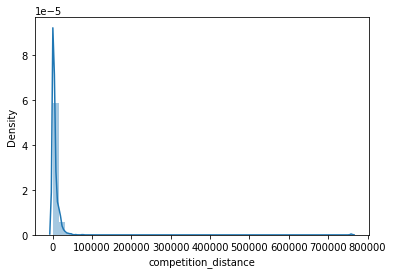

In [53]:
sns.distplot( df1['competition_distance'] )

### 1.7.2 Categorical Attributes

In [62]:
# cat_attributes.apply( lambda x: x.unique.shape[0] )

<AxesSubplot:xlabel='store_type', ylabel='sales'>

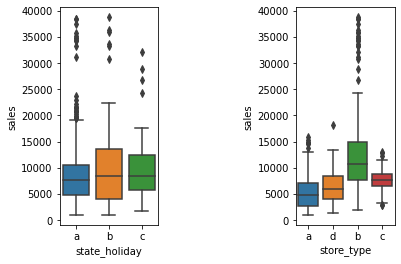

In [76]:
aux1 = df1[ ( df1['state_holiday'] != '0' ) & ( df1['sales'] > 0 )] # para tirar os que nao tem vendas ou nao tem estaçao

plt.subplot( 1,3,1 )
sns.boxplot( x='state_holiday' , y='sales' , data=aux1 )

plt.subplot( 1,3,3 )
sns.boxplot( x='store_type' , y='sales' , data=aux1 )

# plt.subplot( 1,3,2 )
# sns.boxplot( x='assortment' , y='sales' , data=aux1 )

#o grafico é dividido em quartis, senod o do meio o 75  e25, a linha representa a mediana quartil 50
# video do meigarom representa mt bem o que a  gente deve olhar quando ver esse tipo de grafico
# modulo 2 , video 3 
